In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('Forest_Fire.csv')

In [3]:
df.head()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             29 non-null     object
 1   Oxygen           39 non-null     int64 
 2   Temperature      39 non-null     int64 
 3   Humidity         39 non-null     int64 
 4   Fire Occurrence  39 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [5]:
df.isnull().sum()

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.tail()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
24,das,78,49,8,1
25,das,89,45,18,1
26,ads,21,12,44,0
27,ads,11,20,59,0
28,asd,1,32,70,0


<AxesSubplot: xlabel='Fire Occurrence'>

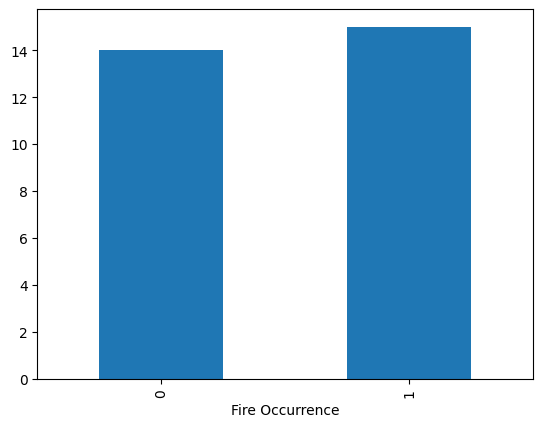

In [8]:
df.groupby('Fire Occurrence')['Area'].count().plot(kind='bar')

<AxesSubplot: ylabel='Oxygen'>

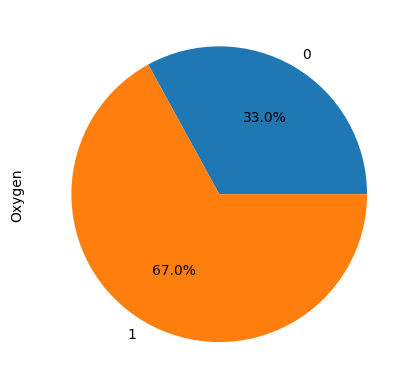

In [9]:
df.groupby('Fire Occurrence')['Oxygen'].mean().plot(kind='pie',autopct='%.1f%%')

<AxesSubplot: ylabel='Temperature'>

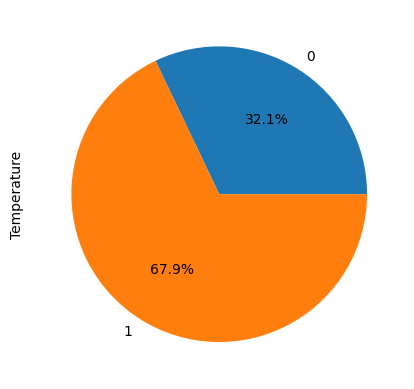

In [10]:
df.groupby('Fire Occurrence')['Temperature'].mean().plot(kind='pie',autopct='%.1f%%')


<AxesSubplot: ylabel='Humidity'>

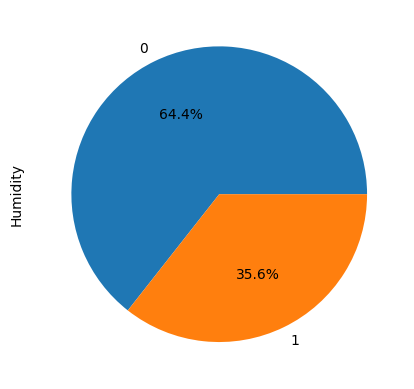

In [11]:
df.groupby('Fire Occurrence')['Humidity'].mean().plot(kind='pie',autopct='%.1f%%')


<AxesSubplot: xlabel='Area', ylabel='Oxygen'>

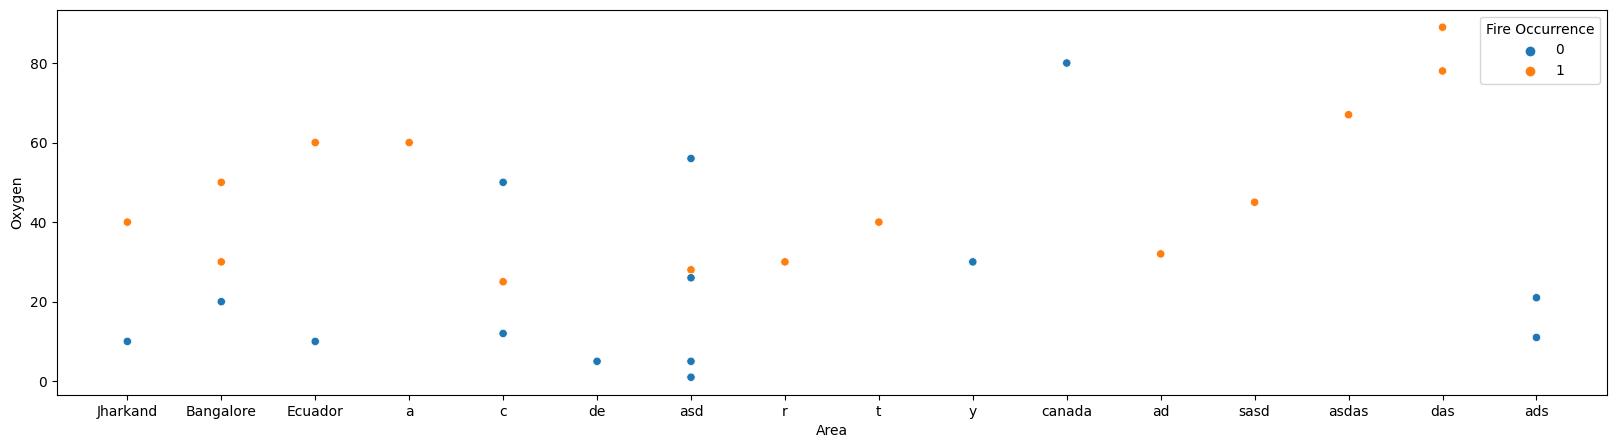

In [12]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Area',y='Oxygen',data=df,hue='Fire Occurrence')

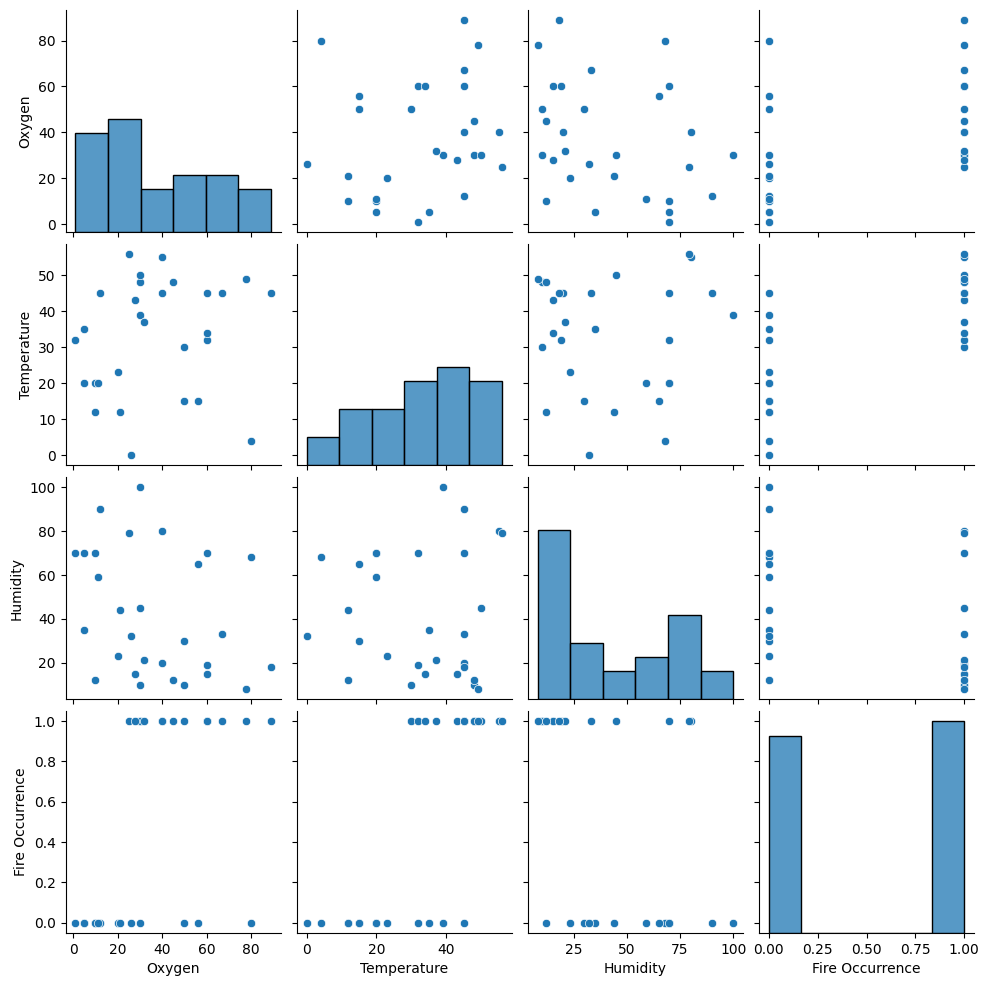

In [13]:
sns.pairplot(df)

In [14]:
df.columns.to_list()

['Area', 'Oxygen', 'Temperature', 'Humidity', 'Fire Occurrence']

In [15]:
X = df[['Oxygen', 'Temperature', 'Humidity']].values
Y = df['Fire Occurrence'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=100,test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier()

In [20]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
pred = rfc.predict(X_test)
pred

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [27]:
pred = lr.predict(X_test)

In [28]:
pred

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [29]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [30]:
pickle.dump(lr,open('model.pkl','wb'))